<a href="https://colab.research.google.com/github/beccacauthorn/trackingrecidivisminIowa/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox

In [ ]:
url = 'https://raw.githubusercontent.com/beccacauthorn/beccacauthorn.github.io/master/img/Copy%20of%203-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv'

In [ ]:
df = pd.read_csv(url, encoding='unicode_escape')

In [ ]:
df.shape

(26020, 12)

In [ ]:
df.head(5)

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


target: 'Recidivism - Return to Prison numeric', did the person commit another crime after being released from prison in a three year period 
problem type: binary classification

In [ ]:
#target distribution 
#Classification: How many classes? 
df['Recidivism - Return to Prison numeric'].nunique()

2

In [ ]:
df['Release type: Paroled to Detainder united'].value_counts(normalize=True)

Parole                        0.648116
Discharged End of Sentence    0.303982
Special Sentence              0.030835
Paroled to Detainer           0.017067
Name: Release type: Paroled to Detainder united, dtype: float64

In [ ]:
#Are the classes imbalanced? 
#The majority class occurs with 66% frequency, not too imbalanced so I can use accuracy score.
df['Recidivism - Return to Prison numeric'].value_counts(normalize=True)

0    0.666372
1    0.333628
Name: Recidivism - Return to Prison numeric, dtype: float64

In [ ]:
#Clean and Explore data
df.isnull().sum()

Fiscal Year Released                            0
Recidivism Reporting Year                       0
Race - Ethnicity                               30
Age At Release                                  3
Convicting Offense Classification               0
Convicting Offense Type                         0
Convicting Offense Subtype                      0
Main Supervising District                    9581
Release Type                                 1762
Release type: Paroled to Detainder united    1762
Part of Target Population                       0
Recidivism - Return to Prison numeric           0
dtype: int64

In [ ]:
#would want to encode this ordinally, would assign number 1-5 based on age group 
df['Age At Release '].nunique()

5

In [ ]:
df['Age At Release '].value_counts(normalize=True)

25-34           0.367221
35-44           0.239190
Under 25        0.176423
45-54           0.167083
55 and Older    0.050083
Name: Age At Release , dtype: float64

In [ ]:
df['Age At Release '] = df['Age At Release '].map({'Under 25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55 and Older': 5})

In [ ]:
# Manually impute the most frequent value on those rows that are missing
df.loc[df['Age At Release '].isnull(), 'Age At Release '] = 2

In [ ]:
df['Age At Release '].isnull().sum()

0

In [ ]:
df.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,1.0,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,5.0,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,2.0,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,5.0,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,2.0,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


In [ ]:
# The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
#Could be interesting feature to include
df['Part of Target Population'].value_counts()

Yes    14274
No     11746
Name: Part of Target Population, dtype: int64

In [ ]:
df['Convicting Offense Type'].nunique()

5

In [ ]:
#use one-hot encoding, would make five different columns 
df['Convicting Offense Type'].value_counts(normalize=True)

Drug            0.304189
Property        0.283282
Violent         0.223520
Public Order    0.138663
Other           0.050346
Name: Convicting Offense Type, dtype: float64

In [ ]:
df['Release Type'].value_counts(normalize=True)

Parole                                 0.648075
Discharged End of Sentence             0.303982
Special Sentence                       0.030835
Paroled to Detainer - Out of State     0.005648
Paroled to Detainer - INS              0.005524
Paroled to Detainer - U.S. Marshall    0.003174
Paroled to Detainer - Iowa             0.002721
Interstate Compact Parole              0.000041
Name: Release Type, dtype: float64

In [ ]:
#use one-hot encoding, would make four different columns 
df['Release type: Paroled to Detainder united'].value_counts(normalize=True)

Parole                        0.648116
Discharged End of Sentence    0.303982
Special Sentence              0.030835
Paroled to Detainer           0.017067
Name: Release type: Paroled to Detainder united, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                         26020 non-null int64
Recidivism Reporting Year                    26020 non-null int64
Race - Ethnicity                             25990 non-null object
Age At Release                               26020 non-null float64
Convicting Offense Classification            26020 non-null object
Convicting Offense Type                      26020 non-null object
Convicting Offense Subtype                   26020 non-null object
Main Supervising District                    16439 non-null object
Release Type                                 24258 non-null object
Release type: Paroled to Detainder united    24258 non-null object
Part of Target Population                    26020 non-null object
Recidivism - Return to Prison numeric        26020 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 2.4+ MB


In [ ]:
#Drop release type because release united column has the same information but has also aggregated the least frequent classes, helping to diminish some noise by doing this
#Drop Main Supervising District due to high number of missing values
df = df.drop(columns=['Release Type', 'Main Supervising District'])

In [ ]:
df.shape

(26020, 10)

In [ ]:
df = df.fillna('Missing')

In [ ]:
df.isnull().sum()

Fiscal Year Released                         0
Recidivism Reporting Year                    0
Race - Ethnicity                             0
Age At Release                               0
Convicting Offense Classification            0
Convicting Offense Type                      0
Convicting Offense Subtype                   0
Release type: Paroled to Detainder united    0
Part of Target Population                    0
Recidivism - Return to Prison numeric        0
dtype: int64

In [ ]:
df.dtypes

Fiscal Year Released                           int64
Recidivism Reporting Year                      int64
Race - Ethnicity                              object
Age At Release                               float64
Convicting Offense Classification             object
Convicting Offense Type                       object
Convicting Offense Subtype                    object
Release type: Paroled to Detainder united     object
Part of Target Population                     object
Recidivism - Return to Prison numeric          int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Recidivism - Return to Prison numeric')
y = df['Recidivism - Return to Prison numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=43)

In [ ]:
X_train.shape

(14636, 9)

In [ ]:
X_val.shape

(4879, 9)

In [ ]:
X_test.shape

(6505, 9)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

predict_recidivism = baseline.predict(X_val)
accuracy_score(y_val, predict_recidivism)

0.6575117852018856

In [ ]:
%%time
import category_encoders as ce 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_jobs=-1, random_state=42, min_samples_leaf=3, n_estimators=300)
)


pipeline.fit(X_train, y_train)
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))
print('Test Accuracy:', pipeline.score(X_test, y_test))

Training Accuracy: 0.7102350368953266
Validation Accuracy: 0.6685796269727403
Test Accuracy: 0.6745580322828594
CPU times: user 8.23 s, sys: 206 ms, total: 8.44 s
Wall time: 5.21 s


In [ ]:
%%time
import category_encoders as ce 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform 

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_jobs=-1, min_samples_leaf=2)
)

param_distributions = {
    'randomforestclassifier__n_estimators': [10,50,100,500],
    'randomforestclassifier__max_depth': [5,10,15,20, None],
    'randomforestclassifier__max_features': uniform(0,1)
    }
    
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3,  
    scoring='accuracy',
    verbose=10,
    return_train_score=True, 
    n_jobs=-1
)

CPU times: user 4.01 ms, sys: 7.99 ms, total: 12 ms
Wall time: 12.2 ms


In [ ]:
search.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5

In [ ]:
search.best_estimator_.score(X_train, y_train)

0.6913774255261

In [ ]:
search.best_estimator_.score(X_val, y_val)

0.6702193072350892

In [ ]:
search.best_estimator_.score(X_test, y_test)

0.6744043043812452

In [ ]:
search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 0.25957313569199436,
 'randomforestclassifier__n_estimators': 500}

In [ ]:
transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True))

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val) 
X_test_transformed = transformers.transform(X_test) 

model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
#model.fit(X_train_transformed, y_train)
model.fit(X_test_transformed, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
feature_names = X_test_transformed.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Age At Release                                                  0.112283
Fiscal Year Released                                            0.049654
Recidivism Reporting Year                                       0.044796
Release type: Paroled to Detainder united_Parole                0.034466
Part of Target Population_No                                    0.031422
                                                                  ...   
Race - Ethnicity_Black -                                        0.000000
Race - Ethnicity_N/A -                                          0.000000
Convicting Offense Classification_Simple Misdemeanor            0.000000
Convicting Offense Classification_Other Felony (Old Code)       0.000000
Race - Ethnicity_American Indian or Alaska Native - Hispanic    0.000000
Length: 68, dtype: float64

In [ ]:
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names
)

Weight,Feature
0.1123 ± 0.0030,Age At Release
0.0497 ± 0.0040,Fiscal Year Released
0.0448 ± 0.0019,Recidivism Reporting Year
0.0345 ± 0.0032,Release type: Paroled to Detainder united_Parole
0.0314 ± 0.0036,Part of Target Population_No
0.0287 ± 0.0046,Race - Ethnicity_White - Non-Hispanic
0.0284 ± 0.0041,Convicting Offense Classification_D Felony
0.0274 ± 0.0055,Convicting Offense Classification_C Felony
0.0244 ± 0.0057,Part of Target Population_Yes
0.0222 ± 0.0031,Release type: Paroled to Detainder united_Discharged End of Sentence


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),  
    LogisticRegression()
)

lr.fit(X_train, y_train)
print('Logistic Regression', lr.score(X_val, y_val))

Logistic Regression 0.6607911457265833


In [ ]:
from sklearn import metrics
y_pred = lr.predict(X_val)
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[3143,   65],
       [1590,   81]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

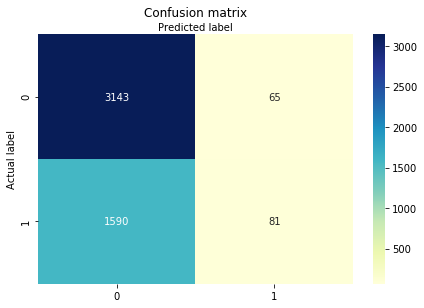

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from xgboost import XGBRegressor

gb = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train_transformed, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Pipeline(memory=None,
         steps=[('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=200, n_jobs=-1,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Age At Release '

isolated = pdp_isolate(
    model = gb,
    dataset=X_test_transformed,
    model_features=X_test_transformed.columns,
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


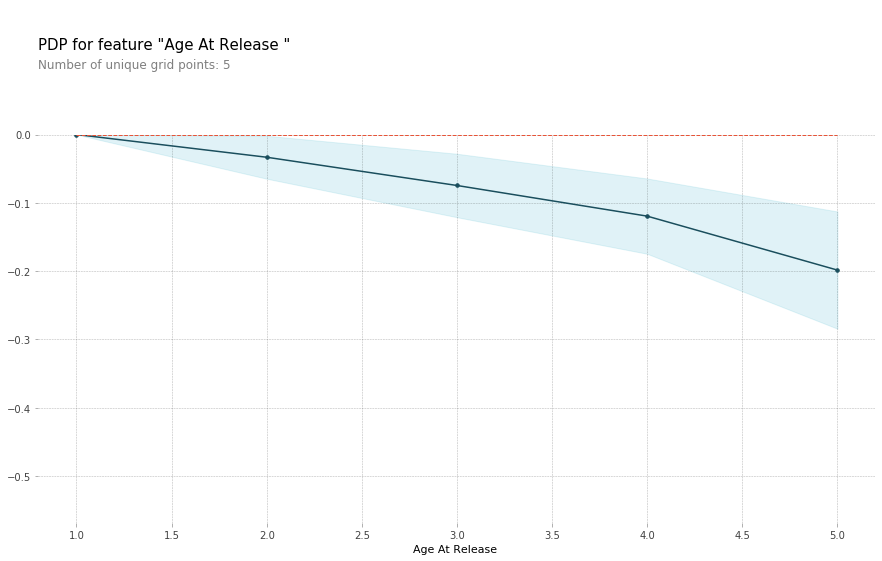

In [ ]:
pdp_plot(isolated, feature_name=feature);

In [ ]:
# Pivot table to see how many people who were in the program commited a crime again
on_parole = df[df['Release type: Paroled to Detainder united'] == 'Parole']
on_parole.pivot_table(index='Part of Target Population', columns='Recidivism - Return to Prison numeric', aggfunc='size', fill_value=0)

Recidivism - Return to Prison numeric,0,1
Part of Target Population,,
No,2416,1258
Yes,7319,4729


In [ ]:
1258/2416, 4729/7319

(0.5206953642384106, 0.6461265200163957)